In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [48]:
kmax = np.pi
kk = np.linspace(-kmax,kmax,100)

In [86]:
def E(x,mu):
    return x**2-mu

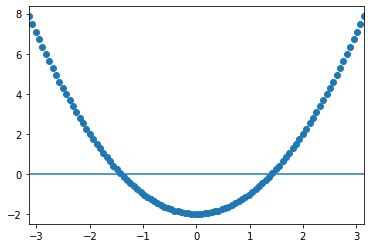

In [87]:
plt.scatter(kk,E(k,2))
plt.xlim(np.min(kk),np.max(kk))
plt.axhline(0)

$\chi(\vec{q}) =\frac{1}{N}\sum_k^N \frac{fd(\xi_k)-fd(\xi_{k+q})}{\xi_{k}-\xi_{k+q}}$

In [88]:
def fd(e,T):
    return 1/(1+np.exp(e/T))

<ipython-input-88-6cba645d60f1>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(e/T))


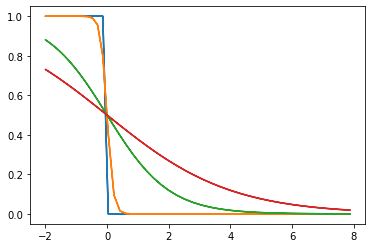

In [89]:
for t in [1e-5,1e-1,1,2]:
    plt.plot(E(kk,mu=2),fd(E(kk,mu=2),t))

In [90]:
def suscep(q,k,mu,T):
        num = fd(E(k,mu),T)-fd(E(k+q,mu),T)
        den = E(k,mu)-E(k+q,mu)
        res = num/den
        av = np.average(res)
        return av

In [91]:
sus1 = [suscep(q,kk,mu=2,T=0.01) for q in kk]

<ipython-input-88-6cba645d60f1>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(e/T))


In [92]:
sus2 = [suscep(q,kk,mu=2,T=0.2) for q in kk]

In [93]:
sus01 = [suscep(q,kk,mu=2,T=0.1) for q in kk]

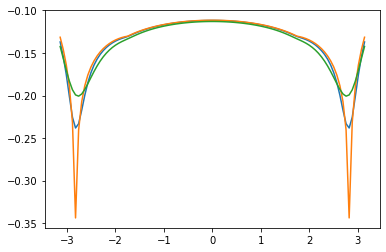

In [94]:
plt.plot(k,sus01)
plt.plot(k,sus1)
plt.plot(k,sus2)

In [95]:
xy = np.array([ [x,y] for x in kk for y in kk])

In [106]:
def E2(x,y,mu):
    return -np.cos(x)-np.cos(y)-mu

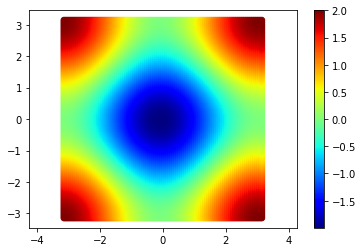

In [137]:
plt.scatter(xy.T[0],xy.T[1],c=E2(xy.T[0],xy.T[1],0),cmap='jet')
plt.axis('equal')
plt.colorbar()

In [122]:
def suscep2(q,k,mu,T):
        num = fd(E2(k.T[0],k.T[1],mu),T)-fd(E2(k.T[0]+q.T[0],k.T[1]+q.T[1],mu),T)
        den = E2(k.T[0],k.T[1],mu)-E2(k.T[0]+q.T[0],k.T[1]+q.T[1],mu)
        res = num/den
        av = np.average(res)
        return av

In [133]:
sus2d01 = [suscep2(q,xy,mu=0,T=0.01) for q in xy]

In [134]:
sus2d1 = [suscep2(q,xy,mu=0,T=0.1) for q in xy]

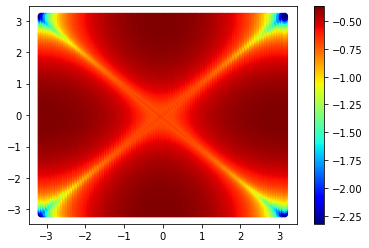

In [138]:
plt.scatter(xy.T[0],xy.T[1],c=sus2d01,cmap='jet')
plt.colorbar()

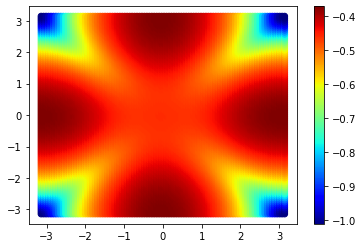

In [139]:
plt.scatter(xy.T[0],xy.T[1],c=sus2d1,cmap='jet')
plt.colorbar()